In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout #Conv2D,  MaxPool2D 

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import tensorflow 
print("Num GPUs Available: ", 
     len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.2.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asgiref                            3.5.0
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      

google-resumable-media             2.2.1
googleapis-common-protos           1.54.0
graphviz                           0.19.1
greenlet                           1.1.1
grpcio                             1.43.0
grpcio-status                      1.43.0
gunicorn                           20.1.0
h5py                               3.2.1
HeapDict                           1.0.1
html5lib                           1.1
httplib2                           0.20.4
huggingface-hub                    0.11.0
idna                               3.2
imagecodecs                        2021.8.26
imageio                            2.9.0
imagesize                          1.2.0
imgaug                             0.4.0
importlib-metadata                 4.8.1
inflection                         0.5.1
iniconfig                          1.1.1
install                            1.3.5
intervaltree                       3.1.0
ipykernel                          6.4.1
ipyparallel                        8.4.1
ipython  

In [3]:
tensorflow.debugging.set_log_device_placement(True)

In [5]:
sess = tensorflow.compat.v1.Session(config=tensorflow.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1



In [6]:
target_img_shape=(128, 128) 

train_dir = 'multucalss_cat_dog_elephant_transfer_learning_from_pre_trainmodel/training_set'  

val_dir = 'multucalss_cat_dog_elephant_transfer_learning_from_pre_trainmodel/validation_set'  

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32, 
                                                 class_mode='sparse') 

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='sparse')

Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


{'cats': 0, 'dogs': 1, 'elephants': 2}
(30, 128, 128, 3)
(30,)
Min Max: 0.0 0.9990582
class: 1.0


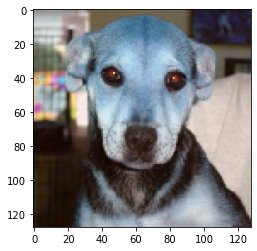

In [8]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    
    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    
    print('Min Max:', img.min(), img.max())
    plt.imshow(img)

    print('class:', labels_batch[0])
    
    break

In [9]:
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2]
[10 10 10]


In [10]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels   

for i in ids:
    print('{:>8} = {}' . format(labels[i], counts[i]))

    cats = 10
    dogs = 10
elephants = 10


In [11]:
label_names = [k for k in train_set.class_indices]
label_names

['cats', 'dogs', 'elephants']

In [12]:
import pandas as pd

df_train_labels = pd.DataFrame({'Label':label_names, 'Count':counts})
df_train_labels.set_index('Label', inplace=True)
df_train_labels

,Count
Label,
cats,10
dogs,10
elephants,10


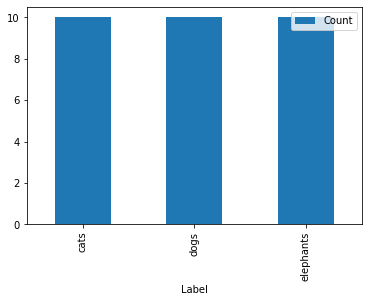

In [13]:
df_train_labels.plot.bar()
plt.show()

In [14]:
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2]
[5 5 5]


In [15]:
_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:', val_count/train_count * 100)

Ratio Validation/Training set: [50. 50. 50.]


-123.68 139.061


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


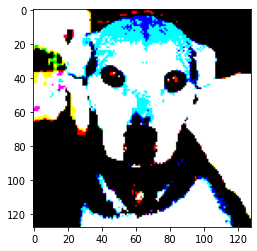

In [16]:
print(train_set[0][0][0].min(),train_set[0][0][1].max())

plt.imshow(train_set[0][0][0])
plt.show()

In [17]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)  # in_shape = (64,64,3)
in_shape

(128, 128, 3)

In [18]:
base_model = ResNet50(include_top=False, weights='imagenet',
                   input_shape=in_shape)  

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))  

model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in

In [19]:
base_model.trainable = False 

In [20]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)  

Trainable..
---
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0
dense_2/kernel:0
dense_2/bias:0


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3

In [24]:
import time

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=15) # 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(train_set, 
                     validation_data=val_set, 
                    epochs=50, verbose=1, callbacks=[es, mc])

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /j

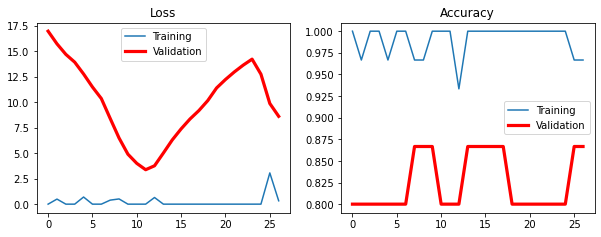

In [25]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [26]:
print(len(val_set))
acc = model.evaluate(val_set, verbose=1)
print('score = {:.3f}' .format(acc[1]))

1
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariabl

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(img_fname):
    img = load_img(img_fname, target_size=target_img_shape) 
    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    pred = model.predict(img)  
    pred_cls = labels[np.argmax(pred, -1)[0]]   
    print('Prediction:', pred_cls, pred[0].round(3))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Opt

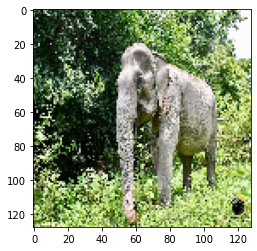

In [28]:
predict('multucalss_cat_dog_elephant_transfer_learning_from_pre_trainmodel/test_set/DSC_0229.jpg')

# transfer from MobileNetV2

In [26]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [27]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)  


base_model = MobileNetV2(include_top=False, weights='imagenet',
                   input_shape=in_shape)  

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))  

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               5243136   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0 

In [28]:
base_model.trainable = False 

In [29]:
import time

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=15) # 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(train_set, 
                     validation_data=val_set, 
                    epochs=20, verbose=1, callbacks=[es, mc])

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 2.2543 - accuracy: 0.4000
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_model.h5
1/1 [==============================] - 3s 3s/step - loss: 2.2543 - accuracy: 0.4000 - val_loss: 6.8320 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 8.4724 - accuracy: 0.3333
Epoch 2: val_accuracy improved from 0.33333 to 0.40000, saving model to best_model.h5
1/1 [==============================] - 1s 864ms/step - loss: 8.4724 - accuracy: 0.3333 - val_loss: 5.4965 - val_accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 3.6771 - accuracy: 0.5000
Epoch 3: val_accuracy improved from 0.40000 to 0.66667, saving model to best_model.h5
1/1 [==============================] - 1s 847ms/step - loss: 3.6771 - accuracy: 0.5000 - val_loss: 5.6943 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 5.9232 - accuracy: 

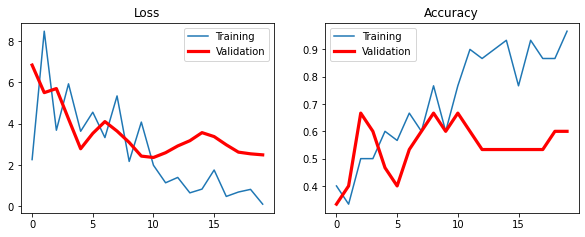

In [30]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [31]:
print(len(val_set))
acc = model.evaluate(val_set, verbose=1)
print('score = {:.3f}' .format(acc[1]))

1
1/1 [==============================] - 0s 178ms/step - loss: 2.4840 - accuracy: 0.6000
score = 0.600


In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(img_fname):
    img = load_img(img_fname, target_size=target_img_shape) 
    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    pred = model.predict(img)  
    pred_cls = labels[np.argmax(pred, -1)[0]]   
    print('Prediction:', pred_cls, pred[0].round(3))

1/1 [==============================] - 1s 583ms/step
Prediction: elephants [0.002 0.029 0.969]


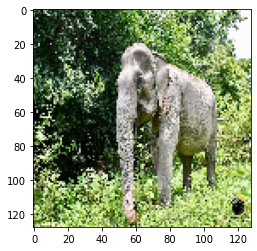

In [33]:
predict('multucalss_cat_dog_elephant_transfer_learning_from_pre_trainmodel/test_set/DSC_0229.jpg')